In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
#Data Loading
X_train = pd.read_csv("X_train.csv") 
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv") 

#### Building the model

In [199]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LeakyReLU, BatchNormalization

inputs = Input(shape=(X_train.shape[1],))
first = Dense(32)(inputs)
batch_norm = BatchNormalization()(first)
leaky = LeakyReLU(negative_slope=0.01)(batch_norm)
second = Dense(128)(leaky)
batch_norm = BatchNormalization()(second)
leaky = LeakyReLU(negative_slope=0.01)(batch_norm)
droput = Dropout(rate=0.5)(leaky)
third = Dense(32)(droput)
leaky = LeakyReLU(negative_slope=0.01)(third)
outputs = Dense(1, activation='tanh')(leaky)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)     │ (None, 49)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 32)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_30 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_31 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_32 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,305 (40.25 KB)

 Non-trainable params: 320 (1.25 KB)

In [200]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=50)

In [201]:
# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, callbacks=[early_stop])

Epoch 1/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6578 - loss: 1.8871 - val_accuracy: 0.7838 - val_loss: 3.4850
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8338 - loss: 2.5522 - val_accuracy: 0.7838 - val_loss: 3.4850
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8331 - loss: 2.3837 - val_accuracy: 0.7838 - val_loss: 3.4853
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8373 - loss: 1.7784 - val_accuracy: 0.7838 - val_loss: 3.4873
Epoch 5/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8334 - loss: 1.4989 - val_accuracy: 0.7838 - val_loss: 2.6265
Epoch 6/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7902 - loss: 1.7298 - val_accuracy: 0.7838 - val_loss: 3.2313
Epoch 7/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8150 - loss: 1.7450 - val_accuracy: 0.7838 - val_loss: 3.0058
Epoch 8/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8342 - loss: 1.5302 - val_accuracy: 0.7838 - v

In [202]:
model.evaluate(X_train, y_train)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9528 - loss: 0.3244 


[0.5188034176826477, 0.934664249420166]

In [203]:
model.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8493 - loss: 0.8229 


[0.9490630030632019, 0.8396739363670349]

In [204]:
# Predict on the test set
y_pred_prob = model.predict(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {roc_auc}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
ROC AUC Score: 0.8329767977620537


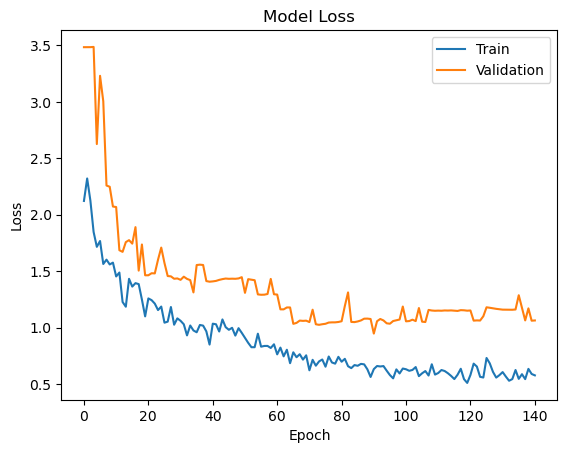

In [205]:
#plot the training and validation loss curve

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

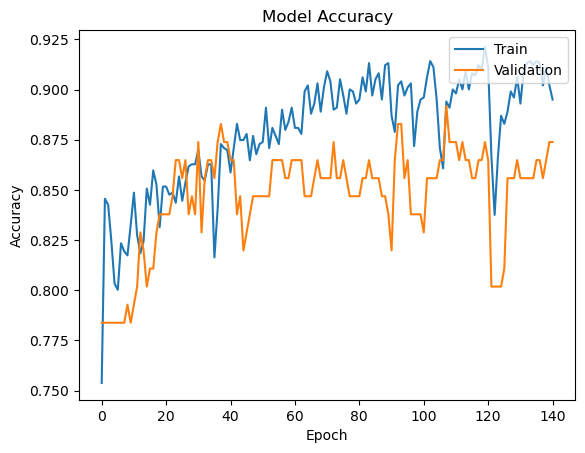

In [206]:
#plot the training and validation accuracy curve

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()